# Text Mining Project (5980UE)
# Hate-Speech Detection using HurtLex lexicon

University of Passau

Text Mining Project(5980UE)

Project Topic 3.16

by

Salim Fares(fares01@ads.uni-passau.de)

Miran Mohammed Rashed(mohamm11@ads.uni-passau.de)

Supervised by

Dr. Jelena Mitrović (jelena.mitrovic@uni-passau.de)

## Dataset And Lexicon

In [1]:
import csv
import pandas as pd

### Loading data, old Lexicon, new Lexicon

In [2]:
df = pd.read_csv('data.csv')
new_lexicon = pd.read_csv('New_Lexicon.csv')
old_lexicon = pd.read_csv('old_lexicon.csv')

Extracting Hateful Tweets

In [3]:
hate_tweets = [tweet for idx, tweet in enumerate(df['clean']) 
               if df['sentiment'][idx] == 'hateful']

Extracting the other Tweets

In [4]:
other_tweets = [tweet for idx, tweet in enumerate(df['clean']) if df['sentiment'][idx] != 'hateful']

## Classification using only the lexicon

### A tweet is classified as hate-tweet if it contains a word from the lexicon

Evaluation Function

In [5]:
def evaluation(predictedHateTweets, hate_tweets, other_tweets):
    FalsePositive = 0 
    FalseNegative = 0
    for tweet in predictedHateTweets:
        if not tweet in hate_tweets:
            FalsePositive+=1
    TruePositive = len(predictedHateTweets) - FalsePositive
    
    for tweet in hate_tweets:
        if not tweet in predictedHateTweets:
            FalseNegative+=1
    TrueNegative = len(other_tweets) - FalsePositive
    
    accuracy = float(TruePositive + TrueNegative)/float(TruePositive + FalsePositive + TrueNegative + FalseNegative)
    precision = float(TruePositive)/float(TruePositive + FalsePositive)
    recall = float(TruePositive)/float(TruePositive + FalseNegative)
    f1_score = 2*((precision*recall)/(precision+recall))
    
    return accuracy, precision, recall, f1_score

Classification using old Lexicon

In [8]:
old_predictedHateTweets = []
for tweet in df['clean']:
    for word in old_lexicon['clean']:
        if word in str(tweet):
            old_predictedHateTweets.append(tweet)
            break

In [9]:
accuracy, precision, recall, f1_score = evaluation(old_predictedHateTweets, hate_tweets, other_tweets)
print ("accuracy : %.4f, precision : %.4f, recall : %.4f, f1_score : %.4f" %(accuracy, precision,recall,f1_score))

accuracy : 0.6671, precision : 0.6987, recall : 0.8832, f1_score : 0.7802


Classification using new Lexicon

In [10]:
predictedHateTweets = []
for tweet in df['clean']:
    for word in new_lexicon['clean']:
        if word in str(tweet):
            predictedHateTweets.append(tweet)
            break

In [11]:
accuracy, precision, recall, f1_score = evaluation(predictedHateTweets, hate_tweets, other_tweets)
print ("accuracy : %.4f, precision : %.4f, recall : %.4f, f1_score : %.4f" %(accuracy, precision,recall,f1_score))

accuracy : 0.6677, precision : 0.7189, recall : 0.8262, f1_score : 0.7688


## Calculating the occurrences of lexicon's words in the corpus

In [12]:
import nltk

Appending Corpus' words into one list

In [13]:
dataset_words = []
for tweet in df['clean']:
    for word in str(tweet).split(" "):
        dataset_words.append(word)

In [14]:
len(dataset_words)

510014

Appending Corpus' words related to hate speech into one list

In [15]:
hate_speech_words = []
for tweet in hate_tweets:
    for word in str(tweet).split(" "):
        hate_speech_words.append(word)

FreqDist for the previous two lists

In [16]:
all_fdist = nltk.FreqDist(word for word in dataset_words)
hate_fdist = nltk.FreqDist(word for word in hate_speech_words)

In [17]:
import matplotlib.pyplot as plt

Most 30 frequent word in dataset

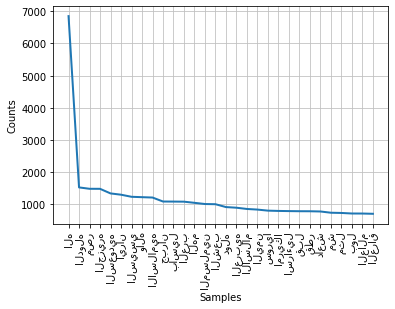

In [18]:
all_fdist.plot(30)

Most 30 frequent word in hateful tweets

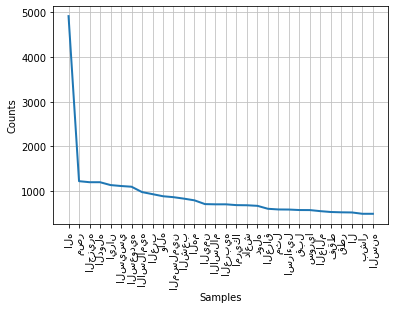

In [19]:
hate_fdist.plot(30)

old lexicon's words frequencies

In [20]:
old_lex_dist = {}
for word in set(old_lexicon['clean']):
    old_lex_dist[word] = hate_fdist[word]

sort new lexicon's words frequencies

In [21]:
old_lex_tuple = [(value, key) for key, value in old_lex_dist.items()]
old_lex_tuple.sort(key=lambda tup: tup[0], reverse=True)

In [22]:
old_lex_tuple

[(4917, 'اله'),
 (461, 'اهل'),
 (446, 'قتل'),
 (392, 'الارهاب'),
 (381, 'اليهود'),
 (304, 'شعب'),
 (248, 'خنزير'),
 (188, 'كلب'),
 (186, 'المجرمين'),
 (182, 'الارهابين'),
 (181, 'رءيس'),
 (161, 'مجرم'),
 (153, 'الكذب'),
 (149, 'اسود'),
 (138, 'الحشد'),
 (137, 'بني'),
 (136, 'ارهابي'),
 (132, 'الكلاب'),
 (129, 'كذب'),
 (128, 'راس'),
 (127, 'قوه'),
 (120, 'القتل'),
 (107, 'شيخ'),
 (105, 'الكلب'),
 (102, 'الارهابي'),
 (99, 'شر'),
 (95, 'المنافقين'),
 (94, 'وسخ'),
 (90, 'اتباع'),
 (89, 'قوم'),
 (84, 'خاءن'),
 (84, 'بيت'),
 (83, 'عدم'),
 (82, 'الحمير'),
 (81, 'النفاق'),
 (81, 'قاتل'),
 (76, 'وزير'),
 (74, 'الفساد'),
 (74, 'ثوره'),
 (74, 'مات'),
 (71, 'دماء'),
 (70, 'حمار'),
 (70, 'اعرف'),
 (69, 'الحمار'),
 (65, 'جراءم'),
 (65, 'كذاب'),
 (64, 'كره'),
 (64, 'القاتل'),
 (63, 'يهود'),
 (63, 'منافق'),
 (62, 'الكثير'),
 (61, 'كاتب'),
 (61, 'يهودي'),
 (61, 'غبي'),
 (59, 'المشكله'),
 (59, 'خلف'),
 (58, 'الشر'),
 (56, 'ارهاب'),
 (56, 'اليه'),
 (56, 'اعدام'),
 (56, 'اليهودي'),
 (56, 'كس'),
 (56, 'مشك

new lexicon's words frequencies

In [23]:
new_lex_dist ={}
for word in set(new_lexicon['clean']):
    new_lex_dist[word] = hate_fdist[word]

sort new lexicon's words frequencies

In [24]:
new_lex_tuple = [(value, key) for key, value in new_lex_dist.items()]
new_lex_tuple.sort(key=lambda tup: tup[0], reverse=True)

In [25]:
new_lex_tuple

[(446, 'قتل'),
 (396, 'بول'),
 (392, 'الارهاب'),
 (381, 'اليهود'),
 (308, 'لعنه'),
 (248, 'خنزير'),
 (188, 'كلب'),
 (182, 'الارهابين'),
 (161, 'مجرم'),
 (153, 'الكذب'),
 (149, 'اسود'),
 (137, 'بني'),
 (136, 'ارهابي'),
 (132, 'الكلاب'),
 (129, 'كذب'),
 (128, 'راس'),
 (127, 'قوه'),
 (120, 'القتل'),
 (105, 'الكلب'),
 (105, 'خونه'),
 (102, 'الارهابي'),
 (99, 'شر'),
 (96, 'تعالي'),
 (96, 'عبيد'),
 (95, 'المنافقين'),
 (94, 'وسخ'),
 (84, 'خاءن'),
 (83, 'عدم'),
 (82, 'تبا'),
 (81, 'النفاق'),
 (81, 'قاتل'),
 (74, 'ثوره'),
 (74, 'مات'),
 (70, 'حمار'),
 (69, 'الحمار'),
 (65, 'جراءم'),
 (65, 'كذاب'),
 (64, 'كره'),
 (64, 'القاتل'),
 (63, 'يهود'),
 (63, 'منافق'),
 (62, 'مجرمين'),
 (61, 'كاتب'),
 (61, 'يهودي'),
 (61, 'غبي'),
 (59, 'خلف'),
 (58, 'الشر'),
 (56, 'ارهاب'),
 (56, 'اليه'),
 (56, 'اليهودي'),
 (56, 'كس'),
 (56, 'مشكله'),
 (55, 'الخنزير'),
 (54, 'كافر'),
 (53, 'عصابه'),
 (52, 'بايره'),
 (52, 'ارهابيه'),
 (52, 'انقلاب'),
 (51, 'اذناب'),
 (50, 'الغباء'),
 (50, 'الجهل'),
 (50, 'جهل'),
 (49, 'جري

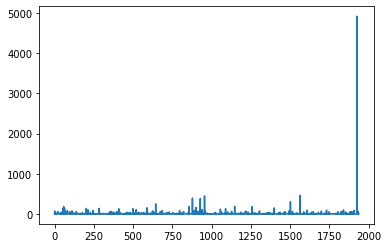

In [26]:
plt.plot(list(old_lex_dist.values()))

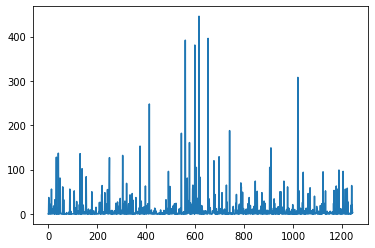

In [27]:
plt.plot(list(new_lex_dist.values()))

old Lexicon's words' categories frequency

In [28]:
old_word_cat = dict()
for cat in set(old_lexicon['category']):
    old_word_cat[cat]= 0
for idx, word in enumerate(old_lexicon['clean']): 
    old_word_cat[old_lexicon['category'][idx]]+= hate_fdist[word]

In [29]:
old_catCount = [(cat, count) for cat,count in old_word_cat.items()]
old_catCount.sort(key=lambda tup: tup[1], reverse=True)

In [30]:
old_catCount

[('cds', 11965),
 ('re', 4734),
 ('an', 2376),
 ('dmc', 2360),
 ('ps', 1951),
 ('ddp', 1334),
 ('asm', 1124),
 ('qas', 958),
 ('om', 621),
 ('svp', 584),
 ('pr', 457),
 ('or', 449),
 ('pa', 433),
 ('is', 259),
 ('asf', 250),
 ('ddf', 96),
 ('rci', 7)]

new Lexicon's words' categories frequency

In [31]:
new_word_cat = dict()
for cat in set(new_lexicon['category']):
    new_word_cat[cat]= 0
for idx, word in enumerate(new_lexicon['clean']): 
    new_word_cat[new_lexicon['category'][idx]]+= hate_fdist[word]

In [32]:
new_catCount = [(cat, count) for cat,count in new_word_cat.items()]
new_catCount.sort(key=lambda tup: tup[1], reverse=True)

In [33]:
new_catCount

[('re', 4601),
 ('cds', 3989),
 ('an', 3299),
 ('dmc', 2270),
 ('ps', 1988),
 ('ddp', 1248),
 ('asm', 1160),
 ('qas', 612),
 ('svp', 474),
 ('pr', 444),
 ('om', 394),
 ('or', 322),
 ('is', 253),
 ('asf', 249),
 ('pa', 203),
 ('ddf', 95),
 ('rci', 7)]

extracting new words and expressions by looking at hateful_not_offinsive tweets

In [34]:
def hatful_offinsive(hate_tweets):
    hatful_offinsive_tweets = []
    for tweet in set(hate_tweets):
        for word in new_lexicon['clean']:
            if word in tweet:
                hatful_offinsive_tweets.append(tweet)
                break
    return hatful_offinsive_tweets

In [35]:
hatful_offinsive_tweets = hatful_offinsive(hate_tweets)

In [36]:
hatful_not_offinsive_tweets = set(hate_tweets) - set(hatful_offinsive_tweets)

In [37]:
hatful_not_offinsive_tweets

{'مقال يستحق اخذه بجديه الاخونجيه لايفهمون لكنه عشم ابليس الجنه',
 'اسال اله العزيز يرزق روسيا بصاروخ نوي يعلمهم رحمه اله',
 'رجل',
 'لوفي عدل وصدق مش كنا هنعرف الحقيقه بدل الحقيقه المرهه',
 'استهدفو السفن يوم واحد',
 'قالوا لبيك حسين لبيك حسين بارك اباما اليس موالي لال البيت',
 'مش مامنين ابو حسين',
 'القيروان تنام ضيم واله تامنوا بامان نافذ المجاهدين تذعنوا وتوحدوه',
 'لسلام لحرب',
 'يختبر المسلمين بلابتلاء ولن يحيدو يختبر المسلمين بالفتنه والهوي ولن يحيدوا يخزلنا كن نظن خير ولن نحيد وليعلم القراء عاش جيش الخلافه',
 'هيحماسلا تكن الشعب الفلسطيني',
 'وحضرتك صناعه',
 'حضر فرانسوا هولاكو المجلس بركه لهذا المجلس لانه حاقد حارب الاسلام اساء نبينامحمد',
 'ولماذا يدعوا المصريات لخلع حجبهن ولماذا يدعوا زوجته مارسه الحب صديقها ميدان التحرير مثلا',
 'عزيزي المشمش',
 'قمه خدام امریکا اسراءیل فی المنطقه',
 'والاطفال والمسلمين بيموتوا قصف الامريكان بطاءرات تخرج قاعده انجرليك يموتوا عادي',
 'ياتري اخبار صفقه طاءرات الرافال الفرنسيه حسبنا اله ونعم الوكيل',
 'حرام اخي اتق اله لايجوز راجع دينك',
 'ال